In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from random import random
from tqdm import tqdm

In [2]:
year_start=2002
year_end=2020
year_range=[*range(year_start,year_end+1)]

#race_range=race_names[1:]
race_range=['BLACK ALONE','WHITE ALONE','ASIAN ALONE']

client_num=1000
perf_list=['race']+[str(y)+'_avg_default' for y in year_range]

In [83]:
colors=['#90DBF4','#F1C0E8','#B9FBC0','#3D405B'] ##A3B18A #B9FBC0
#colors=['#DEE2FF','#CBC0D3','#EFD3D7']
pal=dict(zip(race_range,colors[:len(race_range)]))

In [181]:
group_perf=pd.read_csv('group_perf.csv',header=0)
indiv_perf=pd.read_csv('indiv_perf.csv',header=0)

Text(0, 0.5, 'Average Default Rate')

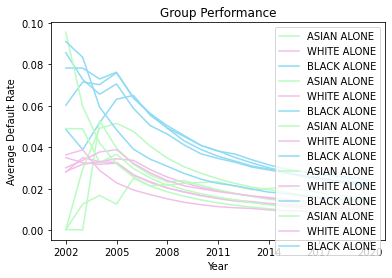

In [182]:
for i in range(group_perf.shape[0]):
    x=year_range
    y=group_perf.loc[i][perf_list[1:]].tolist()
    race_name=group_perf.loc[i][perf_list[0]]
    plt.plot(x,y,color=pal[race_name],label=race_name)
    plt.xticks(year_range[::3])
    plt.legend()
plt.title('Group Performance')
plt.xlabel('Year')
plt.ylabel('Average Default Rate')

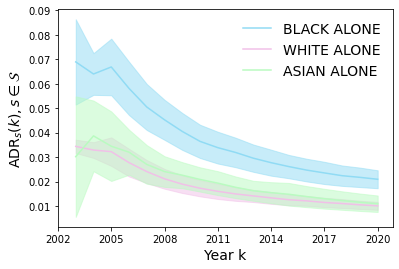

In [183]:
# not setting theta_1>0

pivot=pd.pivot_table(group_perf,index=['race'],values=perf_list[1:],aggfunc=[np.mean,np.std])

for race_name in race_range:

    sub=np.array([pivot[('mean',p)][(race_name)] for p in perf_list[2:]])
    sub1=np.array([pivot[('std',p)][(race_name)] for p in perf_list[2:]])

    plt.plot(year_range[1:],sub,color=pal[race_name],label=race_name)
    plt.fill_between(year_range[1:],sub-sub1,sub+sub1,color=pal[race_name],alpha=0.5)
    
plt.xticks(year_range[::3])
#plt.yticks([0.,0.001])
plt.legend(fontsize=14,frameon=False)
#plt.title('Group Performance',fontsize=16)
plt.xlabel('Year k',fontsize=14)
plt.ylabel(r'ADR$_s(k),s\in\mathcal{S}$',fontsize=14)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

#plt.savefig("group_perf.pdf",bbox_inches='tight')

<ipython-input-184-8305d38bb804>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(x, y, z, cmap='gist_yarg', vmin=0, vmax=D.max(),shading='auto') #'gist_yarg'


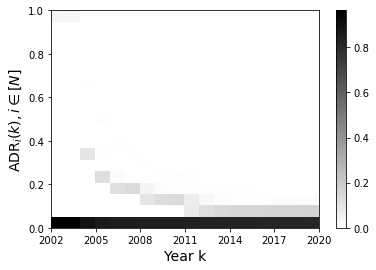

In [184]:
# generate 2 2d grids for the x & y bounds
#y, x = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
box_num=20
y, x = np.meshgrid(np.linspace(0, 1, box_num),np.linspace(2002, 2020, 19))
#z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
D=[]
for year_name in year_range:
    d=indiv_perf[str(year_name)+'_avg_default'].tolist()
    lo=np.histogram(d, bins=np.linspace(0, 1, box_num))[0]/5000
    D+=[lo.tolist()]
D=np.array(D)
z=D
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
#z = z[:-1, :-1]

#z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='gist_yarg', vmin=0, vmax=D.max(),shading='auto') #'gist_yarg'
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([2002,2020,0,1])
fig.colorbar(c, ax=ax)

plt.xticks(year_range[::3])
plt.title('',fontsize=16)
plt.xlabel('Year k',fontsize=14)
plt.ylabel(r'ADR$_i(k),i\in[N]$',fontsize=14)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

#plt.savefig("indiv_perf_heatmap.pdf",bbox_inches='tight')

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:59<00:00, 84.71it/s]


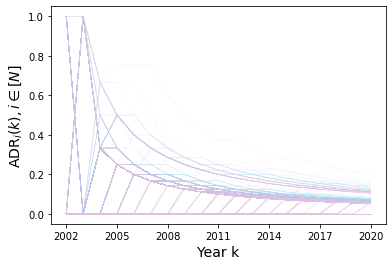

In [185]:
for i in tqdm(range(indiv_perf.shape[0])): #indiv_perf.shape[0]
    x=year_range
    y=indiv_perf.loc[i][perf_list[1:]].tolist()
    race_name=indiv_perf.loc[i][perf_list[0]]
    plt.plot(x,y,color=pal[race_name],label=race_name,alpha=0.2,linewidth=0.5)
    plt.xticks(year_range[::3])
#plt.legend()
plt.xticks(year_range[::3])
#plt.title('Individual Performance',fontsize=16)
plt.xlabel('Year k',fontsize=14)
plt.ylabel(r'ADR$_i(k),i\in[N]$',fontsize=14)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

#plt.savefig("indiv_perf_ts.pdf",bbox_inches='tight')

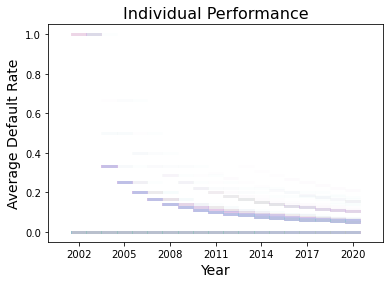

In [136]:
alp=dict(zip(race_range,[0.02,0.02,0.01]))

fig, ax = plt.subplots()

for race_name in race_range:
    sub_indiv=indiv_perf[indiv_perf['race']==race_name]
    d=[]
    for year_name in year_range:
        d+=[sub_indiv[str(year_name)+'_avg_default'].tolist()]
    D=np.array(d)
    #D = np.random.gamma(4, size=(2, 50))
    ax.eventplot(D, orientation='vertical', lineoffsets=year_range,linelengths=1, linewidth=3,colors=pal[race_name],alpha=alp[race_name])

#ax.set(xticks=np.arange(1, 8), yticks=np.arange(1, 8))
#plt.legend()
plt.xticks(year_range[::3])
plt.title('Individual Performance',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Average Default Rate',fontsize=14)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

#plt.savefig("indiv_perf_eventplot.pdf",bbox_inches='tight')